# **Preparación de los Datos**

In [3]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [83]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [84]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
from google.colab import files
uploaded = files.upload()

Saving telecomX.csv to telecomX.csv


In [7]:
datos = pd.read_csv("telecomX.csv")
datos

,ID_Cliente,Evasión,Género,Adulto_Mayor,Tiene_Pareja,Tiene_Dependientes,Meses_Conectado,Servicio_Teléfono,Líneas_Múltiples,Servicio_Internet,...,Protección_Dispositivo,Soporte_Técnico,TV_Streaming,Películas_Streaming,Tipo_Contrato,Factura_Electrónica,Método_Pago,Cargos_Mensuales,Cargos_Totales,Cargos_Diarios
0,0002-ORFBO,0.0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.60,593.30,2.187
1,0003-MKNFE,0.0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.90,542.40,1.997
2,0004-TLHLJ,1.0,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.90,280.85,2.463
3,0011-IGKFF,1.0,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.00,1237.85,3.267
4,0013-EXCHZ,1.0,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.90,267.40,2.797
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0.0,Female,0,0,0,13,1,0,DSL,...,0,1,0,0,One year,0,Mailed check,55.15,742.90,1.838
7263,9992-RRAMN,1.0,Male,0,1,0,22,1,1,Fiber optic,...,0,0,0,1,Month-to-month,1,Electronic check,85.10,1873.70,2.837
7264,9992-UJOEL,0.0,Male,0,0,0,2,1,0,DSL,...,0,0,0,0,Month-to-month,1,Mailed check,50.30,92.75,1.677
7265,9993-LHIEB,0.0,Male,0,1,1,67,1,0,DSL,...,1,1,0,1,Two year,0,Mailed check,67.85,4627.65,2.262


In [8]:
datos.columns


Index(['ID_Cliente', 'Evasión', 'Género', 'Adulto_Mayor', 'Tiene_Pareja',
       'Tiene_Dependientes', 'Meses_Conectado', 'Servicio_Teléfono',
       'Líneas_Múltiples', 'Servicio_Internet', 'Seguridad_En_Línea',
       'Respaldo_En_Línea', 'Protección_Dispositivo', 'Soporte_Técnico',
       'TV_Streaming', 'Películas_Streaming', 'Tipo_Contrato',
       'Factura_Electrónica', 'Método_Pago', 'Cargos_Mensuales',
       'Cargos_Totales', 'Cargos_Diarios'],
      dtype='object')

In [9]:

for col in datos.columns:
    print(f"Columna: {col}")
    print(datos[col].unique())
    print("-" * 30)

Columna: ID_Cliente
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
------------------------------
Columna: Evasión
[ 0.  1. nan]
------------------------------
Columna: Género
['Female' 'Male']
------------------------------
Columna: Adulto_Mayor
[0 1]
------------------------------
Columna: Tiene_Pareja
[1 0]
------------------------------
Columna: Tiene_Dependientes
[1 0]
------------------------------
Columna: Meses_Conectado
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]
------------------------------
Columna: Servicio_Teléfono
[1 0]
------------------------------
Columna: Líneas_Múltiples
['0' '1' 'No phone service']
------------------------------
Columna: Servicio_Internet
['DSL' 'Fiber optic' 'No']
------------------------------
Columna: Seguridad_En_Línea
['0' '1' 'N

In [10]:
datos.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID_Cliente              7267 non-null   object 
 1   Evasión                 7043 non-null   float64
 2   Género                  7267 non-null   object 
 3   Adulto_Mayor            7267 non-null   int64  
 4   Tiene_Pareja            7267 non-null   int64  
 5   Tiene_Dependientes      7267 non-null   int64  
 6   Meses_Conectado         7267 non-null   int64  
 7   Servicio_Teléfono       7267 non-null   int64  
 8   Líneas_Múltiples        7267 non-null   object 
 9   Servicio_Internet       7267 non-null   object 
 10  Seguridad_En_Línea      7267 non-null   object 
 11  Respaldo_En_Línea       7267 non-null   object 
 12  Protección_Dispositivo  7267 non-null   object 
 13  Soporte_Técnico         7267 non-null   object 
 14  TV_Streaming            7267 non-null   

In [11]:
datos.describe()


,Evasión,Adulto_Mayor,Tiene_Pareja,Tiene_Dependientes,Meses_Conectado,Servicio_Teléfono,Factura_Electrónica,Cargos_Mensuales,Cargos_Totales,Cargos_Diarios
count,7043.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7256.000000,7267.000000
mean,0.265370,0.162653,0.484106,0.300124,32.346498,0.902711,0.593230,64.720098,2280.634213,2.157341
std,0.441561,0.369074,0.499782,0.458343,24.571773,0.296371,0.491265,30.129572,2268.632997,1.004322
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.608000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.425000,400.225000,1.181000
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.300000,1391.000000,2.343000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.875000,3785.300000,2.996000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,3.958000


## **Eliminación de Columnas Irrelevantes**

Elimina columnas que no aportan valor al análisis o a los modelos predictivos, como identificadores únicos (por ejemplo, el ID del cliente). Estas columnas no ayudan en la predicción de la cancelación y pueden incluso perjudicar el desempeño de los modelos.



In [12]:
datos = datos.drop(['ID_Cliente'], axis=1)

In [13]:
datos

,Evasión,Género,Adulto_Mayor,Tiene_Pareja,Tiene_Dependientes,Meses_Conectado,Servicio_Teléfono,Líneas_Múltiples,Servicio_Internet,Seguridad_En_Línea,...,Protección_Dispositivo,Soporte_Técnico,TV_Streaming,Películas_Streaming,Tipo_Contrato,Factura_Electrónica,Método_Pago,Cargos_Mensuales,Cargos_Totales,Cargos_Diarios
0,0.0,Female,0,1,1,9,1,0,DSL,0,...,0,1,1,0,One year,1,Mailed check,65.60,593.30,2.187
1,0.0,Male,0,0,0,9,1,1,DSL,0,...,0,0,0,1,Month-to-month,0,Mailed check,59.90,542.40,1.997
2,1.0,Male,0,0,0,4,1,0,Fiber optic,0,...,1,0,0,0,Month-to-month,1,Electronic check,73.90,280.85,2.463
3,1.0,Male,1,1,0,13,1,0,Fiber optic,0,...,1,0,1,1,Month-to-month,1,Electronic check,98.00,1237.85,3.267
4,1.0,Female,1,1,0,3,1,0,Fiber optic,0,...,0,1,1,0,Month-to-month,1,Mailed check,83.90,267.40,2.797
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,0.0,Female,0,0,0,13,1,0,DSL,1,...,0,1,0,0,One year,0,Mailed check,55.15,742.90,1.838
7263,1.0,Male,0,1,0,22,1,1,Fiber optic,0,...,0,0,0,1,Month-to-month,1,Electronic check,85.10,1873.70,2.837
7264,0.0,Male,0,0,0,2,1,0,DSL,0,...,0,0,0,0,Month-to-month,1,Mailed check,50.30,92.75,1.677
7265,0.0,Male,0,1,1,67,1,0,DSL,1,...,1,1,0,1,Two year,0,Mailed check,67.85,4627.65,2.262


In [14]:
datos.head()


,Evasión,Género,Adulto_Mayor,Tiene_Pareja,Tiene_Dependientes,Meses_Conectado,Servicio_Teléfono,Líneas_Múltiples,Servicio_Internet,Seguridad_En_Línea,...,Protección_Dispositivo,Soporte_Técnico,TV_Streaming,Películas_Streaming,Tipo_Contrato,Factura_Electrónica,Método_Pago,Cargos_Mensuales,Cargos_Totales,Cargos_Diarios
0,0.0,Female,0,1,1,9,1,0,DSL,0,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.187
1,0.0,Male,0,0,0,9,1,1,DSL,0,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,1.997
2,1.0,Male,0,0,0,4,1,0,Fiber optic,0,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.463
3,1.0,Male,1,1,0,13,1,0,Fiber optic,0,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.267
4,1.0,Female,1,1,0,3,1,0,Fiber optic,0,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.797


In [17]:
print(datos.isnull().sum())

Evasión                   224
Género                      0
Adulto_Mayor                0
Tiene_Pareja                0
Tiene_Dependientes          0
Meses_Conectado             0
Servicio_Teléfono           0
Líneas_Múltiples            0
Servicio_Internet           0
Seguridad_En_Línea          0
Respaldo_En_Línea           0
Protección_Dispositivo      0
Soporte_Técnico             0
TV_Streaming                0
Películas_Streaming         0
Tipo_Contrato               0
Factura_Electrónica         0
Método_Pago                 0
Cargos_Mensuales            0
Cargos_Totales             11
Cargos_Diarios              0
dtype: int64


In [19]:
print((datos.isnull().mean() * 100).round(2))

Evasión                   3.08
Género                    0.00
Adulto_Mayor              0.00
Tiene_Pareja              0.00
Tiene_Dependientes        0.00
Meses_Conectado           0.00
Servicio_Teléfono         0.00
Líneas_Múltiples          0.00
Servicio_Internet         0.00
Seguridad_En_Línea        0.00
Respaldo_En_Línea         0.00
Protección_Dispositivo    0.00
Soporte_Técnico           0.00
TV_Streaming              0.00
Películas_Streaming       0.00
Tipo_Contrato             0.00
Factura_Electrónica       0.00
Método_Pago               0.00
Cargos_Mensuales          0.00
Cargos_Totales            0.15
Cargos_Diarios            0.00
dtype: float64


In [20]:
print("Duplicados:", datos.duplicated().sum())
datos[datos.duplicated()]
datos = datos.drop_duplicates()


Duplicados: 22


In [21]:
datos = datos.drop_duplicates()


## **Encoding**

Transforma las variables categóricas a formato numérico para hacerlas compatibles con los algoritmos de machine learning. Utiliza un método de codificación adecuado, como one-hot encoding.

*¿Por qué usar OneHotEncoder?*

OneHotEncoder es una herramienta de Scikit-learn que transforma variables categóricas en vectores binarios (0/1), una técnica común para que los modelos de machine learning puedan procesar datos categóricos. Se usa principalmente cuando estás trabajando dentro de un pipeline o si querés que todo el flujo esté bien integrado con Scikit-learn

*Ventajas*

Es compatible con Pipelines
Permite especificar el tipo de array a utilizar
Permite codificar columnas específicas
Evita errores al aplicar el transformador sobre datos con categorías nuevas.

* pd.get_dummies(): rápido, simple, ideal para análisis exploratorio o notebooks.

* OneHotEncoder: profesional, seguro para producción, ideal en pipelines y cuando necesitas consistencia entre train y test.*texto en cursiva*

In [85]:
categoricas = datos.select_dtypes(include=['object']).columns
print(categoricas)


Index(['Género', 'Líneas_Múltiples', 'Servicio_Internet', 'Seguridad_En_Línea',
       'Respaldo_En_Línea', 'Protección_Dispositivo', 'Soporte_Técnico',
       'TV_Streaming', 'Películas_Streaming', 'Tipo_Contrato', 'Método_Pago'],
      dtype='object')


In [86]:
datos_codificados = pd.get_dummies(datos, columns=categoricas, drop_first=True)


In [87]:
datos_codificados.head()
datos_codificados.info()


<class 'pandas.core.frame.DataFrame'>
Index: 7245 entries, 0 to 7266
Data columns (total 34 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Evasión                                     7245 non-null   float64
 1   Adulto_Mayor                                7245 non-null   int64  
 2   Tiene_Pareja                                7245 non-null   int64  
 3   Tiene_Dependientes                          7245 non-null   int64  
 4   Meses_Conectado                             7245 non-null   int64  
 5   Servicio_Teléfono                           7245 non-null   int64  
 6   Factura_Electrónica                         7245 non-null   int64  
 7   Cargos_Mensuales                            7245 non-null   float64
 8   Cargos_Totales                              7245 non-null   float64
 9   Cargos_Diarios                              7245 non-null   float64
 10  Cuentas_Diarias  

In [88]:
# Detectar variables categóricas
categoricas = datos.select_dtypes(include=['object']).columns

# Codificar con One-Hot Encoding
datos_codificados = pd.get_dummies(datos, columns=categoricas, drop_first=True)

# Separar X e y si querés modelar
X = datos_codificados.drop("Evasión", axis=1)
y = datos_codificados["Evasión"]


In [89]:
X = datos.drop("Evasión", axis=1)
y = datos["Evasión"]


In [90]:
columnas_categoricas = X.select_dtypes(include=['object']).columns.tolist()


In [57]:
preprocesador = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first"), columnas_categoricas)
    ],
    remainder="passthrough"  # Deja las columnas numéricas como están
)

In [91]:
X_codificado = preprocesador.fit_transform(X)


In [92]:
# Obtener nombres de las nuevas columnas
nombres_columnas = preprocesador.named_transformers_["cat"].get_feature_names_out(columnas_categoricas)

# Obtener nombres de columnas numéricas
columnas_numericas = X.select_dtypes(exclude=['object']).columns.tolist()

# Combinar todo en un DataFrame
X_final = pd.DataFrame(X_codificado, columns=list(nombres_columnas) + columnas_numericas)


In [93]:
print(X_final.head())
print(X_final.shape)


   Género_Male  Líneas_Múltiples_1  Líneas_Múltiples_No phone service  \
0          0.0                 0.0                                0.0   
1          1.0                 1.0                                0.0   
2          1.0                 0.0                                0.0   
3          1.0                 0.0                                0.0   
4          0.0                 0.0                                0.0   

   Servicio_Internet_Fiber optic  Servicio_Internet_No  Seguridad_En_Línea_1  \
0                            0.0                   0.0                   0.0   
1                            0.0                   0.0                   0.0   
2                            1.0                   0.0                   0.0   
3                            1.0                   0.0                   0.0   
4                            1.0                   0.0                   0.0   

   Seguridad_En_Línea_No internet service  Respaldo_En_Línea_1  \
0             

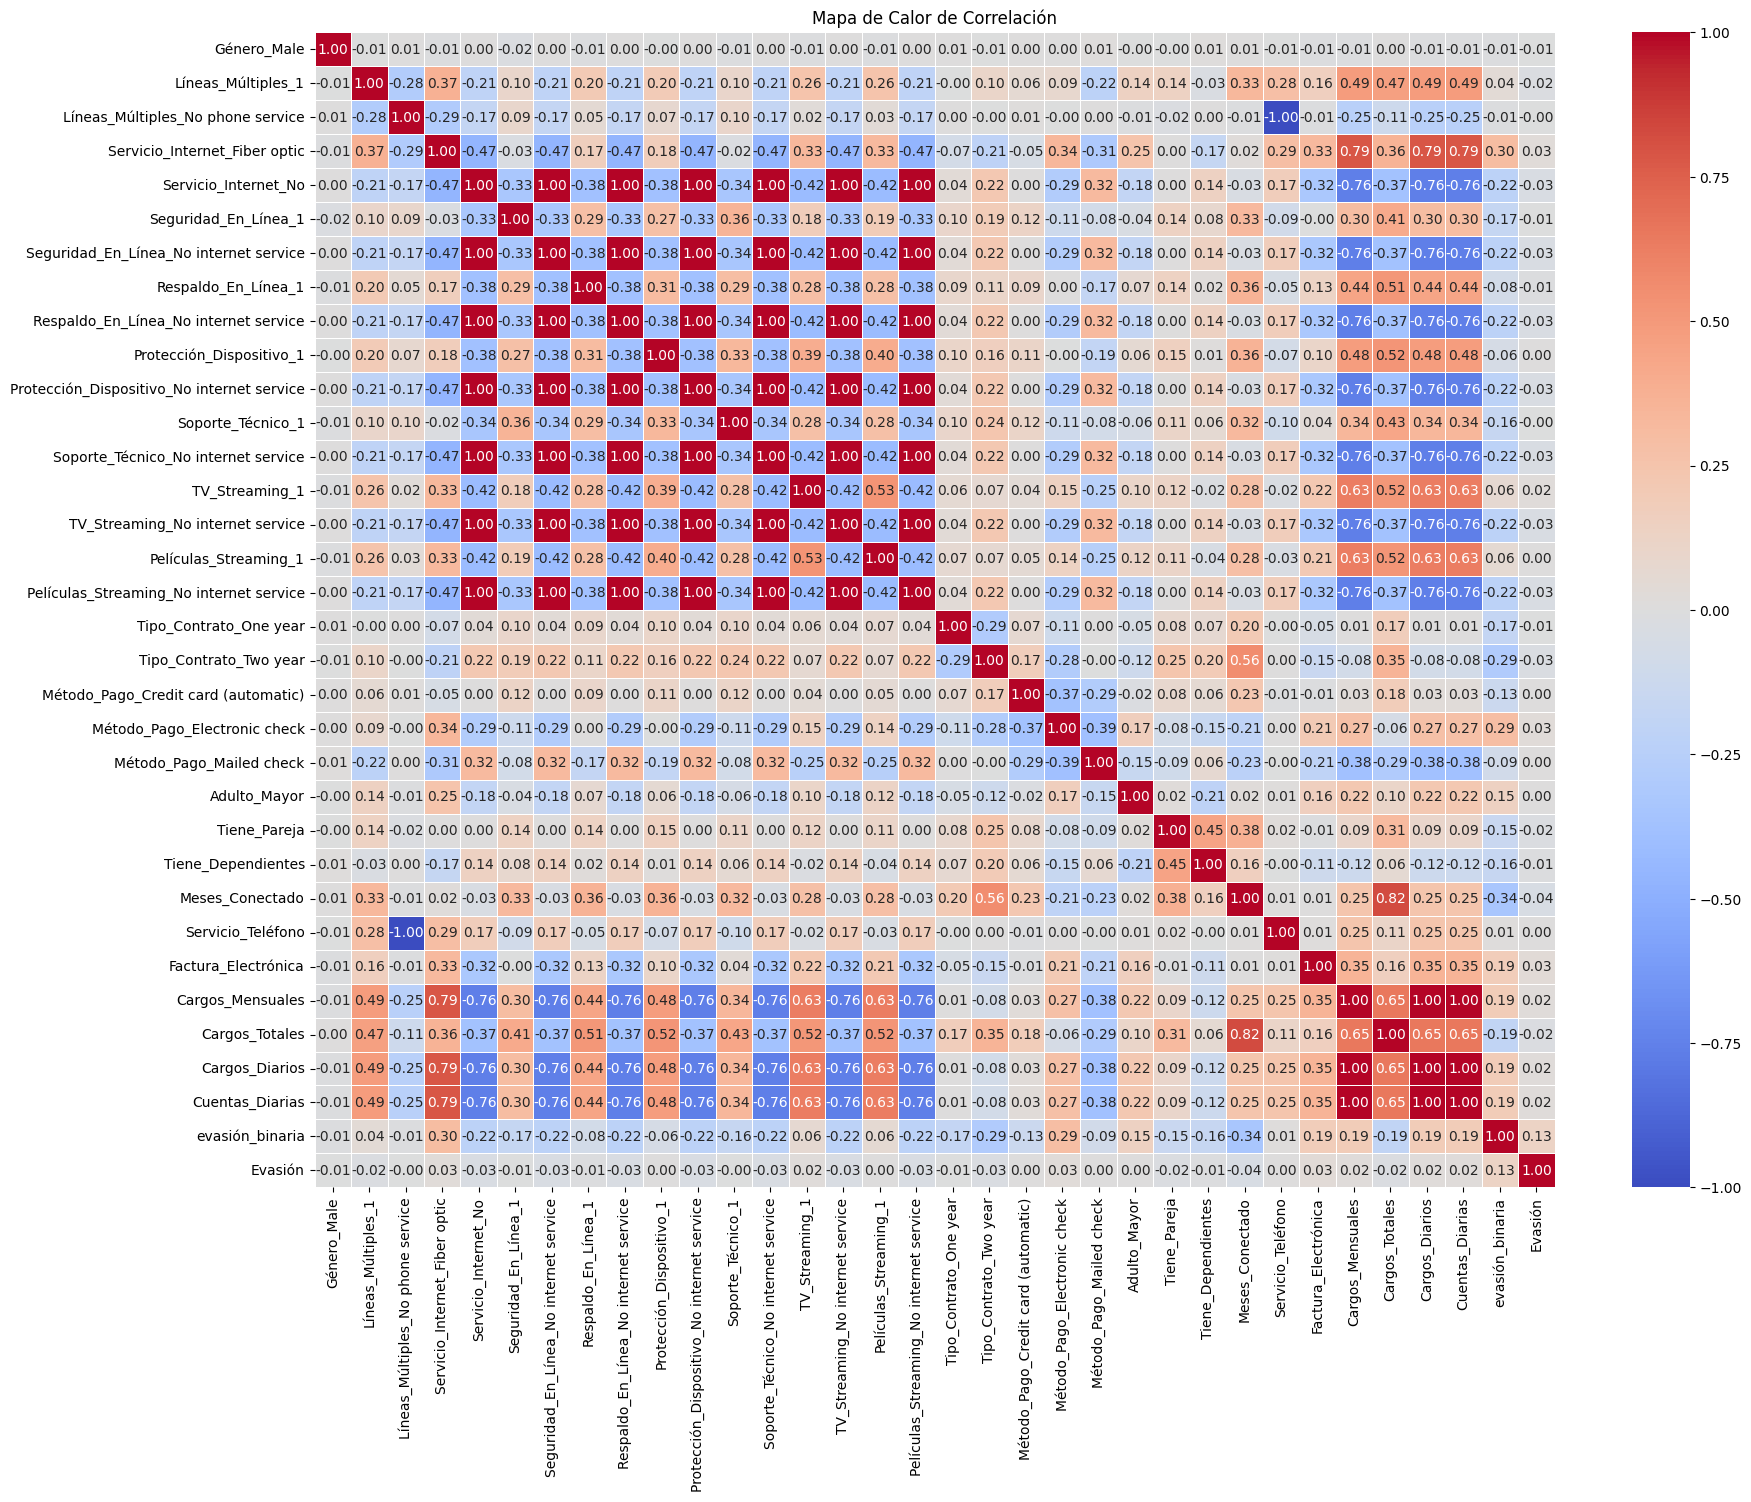

In [94]:
df_corr = X_final.copy()
df_corr["Evasión"] = y

matriz_correlacion = df_corr.corr(numeric_only=True)

plt.figure(figsize=(20, 15))  # Ajustá el tamaño si hay muchas variables
sns.heatmap(matriz_correlacion, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Mapa de Calor de Correlación")
plt.show()


## **Verificación de la Proporción de Cancelación (Churn)**

Calcular la proporción de clientes que cancelaron en relación con los que permanecieron activos. Evalúa si existe un desbalance entre las clases, ya que esto puede impactar en los modelos predictivos y en el análisis de los resultados.


In [95]:
y.value_counts()

y.value_counts(normalize=True)

y.value_counts(normalize=True).map("{:.2%}".format)



,proportion
Evasión,
0.0,74.37%
1.0,25.63%


In [96]:
# Conteo absoluto
print("Conteo de clases:")
print(y.value_counts())

# Proporción
print("\nProporción de clases:")
print(y.value_counts(normalize=True).map("{:.2%}".format))


Conteo de clases:
Evasión
0.0    5388
1.0    1857
Name: count, dtype: int64

Proporción de clases:
Evasión
0.0    74.37%
1.0    25.63%
Name: proportion, dtype: object


In [97]:
# Reset the index of X_final and y
X_final = X_final.reset_index(drop=True)
y = y.reset_index(drop=True)

# Drop rows with NaN in the target variable y
X_final = X_final.loc[y.dropna().index]
y = y.dropna()


# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.3, random_state=42, stratify=y)

# Aplicar SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Verificación
print("Distribución original:", y_train.value_counts())
print("Distribución balanceada:", y_train_res.value_counts())

Distribución original: Evasión
0.0    3771
1.0    1300
Name: count, dtype: int64
Distribución balanceada: Evasión
0.0    3771
1.0    3771
Name: count, dtype: int64


In [98]:
rus = RandomUnderSampler(random_state=42)
X_train_res, y_train_res = rus.fit_resample(X_train, y_train)


In [99]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [100]:
# Contar cantidad de cada clase
conteo_clases = datos['Evasión'].value_counts()

# Mostrar conteo
print("Conteo de clases:")
print(conteo_clases)

# Calcular proporción (porcentaje)
proporcion = datos['Evasión'].value_counts(normalize=True) * 100

print("\nProporción de clases (%):")
print(proporcion)


Conteo de clases:
Evasión
0.0    5388
1.0    1857
Name: count, dtype: int64

Proporción de clases (%):
Evasión
0.0    74.36853
1.0    25.63147
Name: proportion, dtype: float64


**Oversampling — SMOTE (Synthetic Minority Oversampling Technique)**

Genera nuevos ejemplos sintéticos de la clase minoritaria basándose en las instancias existentes. Se usa cuando la clase minoritaria es muy pequeña y quieres evitar perder información.

In [101]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)


**Undersampling — RandomUnderSampler**

Reduce la cantidad de ejemplos en la clase mayoritaria para equilibrar el dataset. Se usa cuando tienes muchos datos en la clase mayoritaria y quieres acelerar el entrenamiento o evitar sobreajuste.

In [102]:
rus = RandomUnderSampler(random_state=42)
X_train_res, y_train_res = rus.fit_resample(X_train, y_train)


In [103]:
# Codificar variables categóricas
categoricas = datos.select_dtypes(include=['object']).columns
datos_codificados = pd.get_dummies(datos, columns=categoricas, drop_first=True)

# Separar X e y
X = datos_codificados.drop("Evasión", axis=1)
y = datos_codificados["Evasión"]

# Dividir en train y test con estratificación
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

# --- OPCIÓN 1: Oversampling con SMOTE ---
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# --- OPCIÓN 2: Undersampling con RandomUnderSampler ---
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

# Crear escalador
scaler = StandardScaler()

# Estandarizar sets balanceados para modelos sensibles
X_train_smote_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

X_train_rus_scaled = scaler.fit_transform(X_train_rus)
# X_test_scaled ya lo tenemos escalado arriba

# Regresión Logística con SMOTE (modelo sensible a escala)
model_lr = LogisticRegression(random_state=42)
model_lr.fit(X_train_smote_scaled, y_train_smote)
score_lr = model_lr.score(X_test_scaled, y_test)
print(f"Accuracy Regresión Logística + SMOTE: {score_lr:.4f}")

# Random Forest con SMOTE (modelo no sensible a escala, datos sin escalar también sirven)
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train_smote, y_train_smote)
score_rf = model_rf.score(X_test, y_test)
print(f"Accuracy Random Forest + SMOTE: {score_rf:.4f}")

# Regresión Logística con Undersampling
model_lr_rus = LogisticRegression(random_state=42)
model_lr_rus.fit(X_train_rus_scaled, y_train_rus)
score_lr_rus = model_lr_rus.score(X_test_scaled, y_test)
print(f"Accuracy Regresión Logística + Undersampling: {score_lr_rus:.4f}")

# Random Forest con Undersampling
model_rf_rus = RandomForestClassifier(random_state=42)
model_rf_rus.fit(X_train_rus, y_train_rus)
score_rf_rus = model_rf_rus.score(X_test, y_test)
print(f"Accuracy Random Forest + Undersampling: {score_rf_rus:.4f}")

Accuracy Regresión Logística + SMOTE: 1.0000
Accuracy Random Forest + SMOTE: 1.0000
Accuracy Regresión Logística + Undersampling: 1.0000
Accuracy Random Forest + Undersampling: 1.0000


# **Correlación y Selección de Variables**

## **Análisis de Correlación**

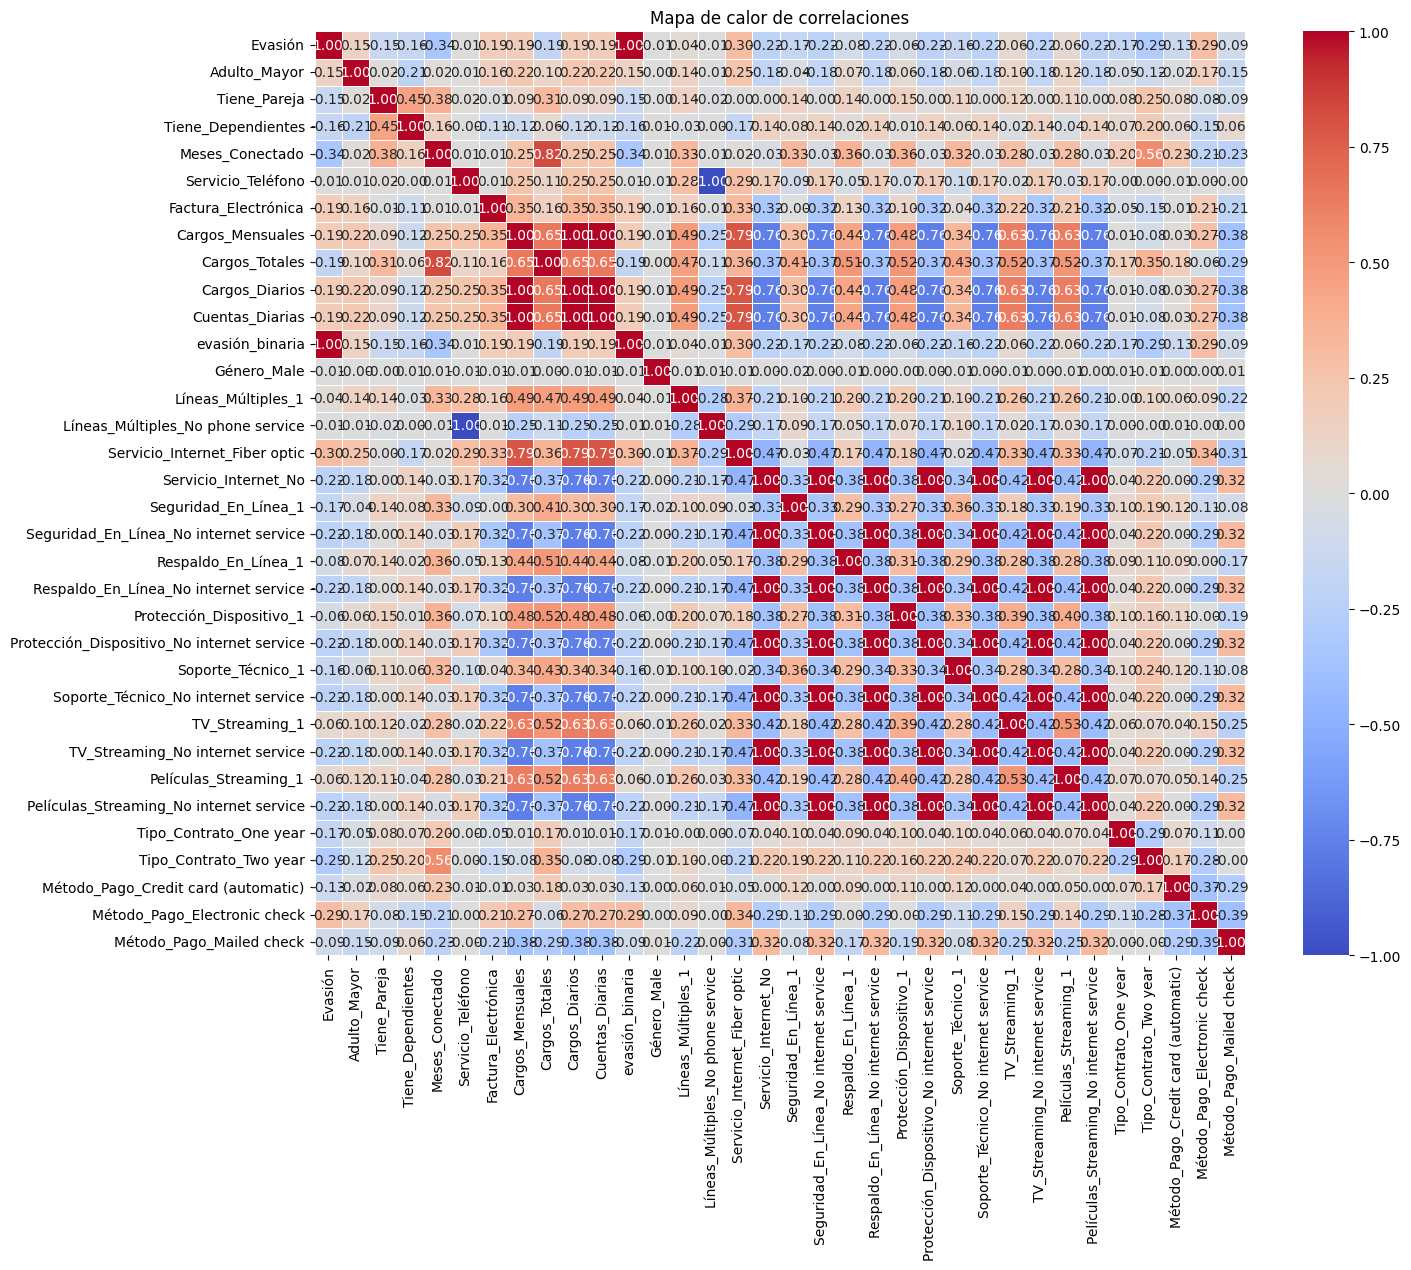

In [104]:
df_corr = datos_codificados.copy()
df_corr['Evasión'] = y
corr = df_corr.corr(numeric_only=True)

# 3. Graficar mapa de calor
plt.figure(figsize=(15,12))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Mapa de calor de correlaciones")
plt.show()


## **Análisis Dirigido**

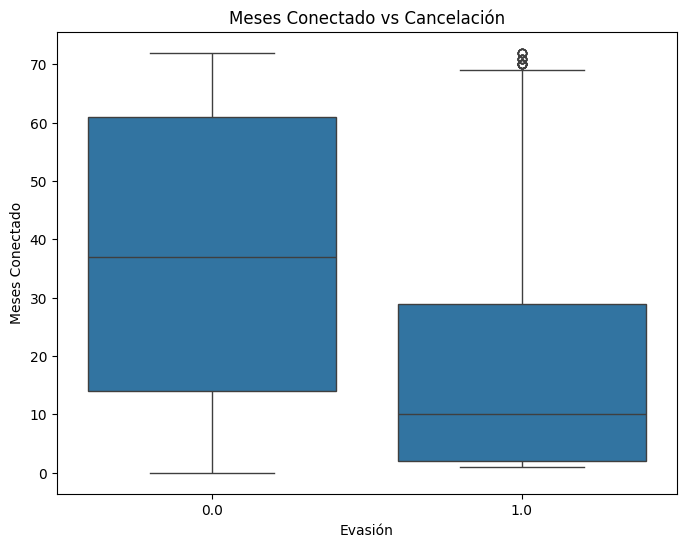

In [105]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Evasión', y='Meses_Conectado', data=datos)
plt.title('Meses Conectado vs Cancelación')
plt.xlabel('Evasión')
plt.ylabel('Meses Conectado')
plt.show()


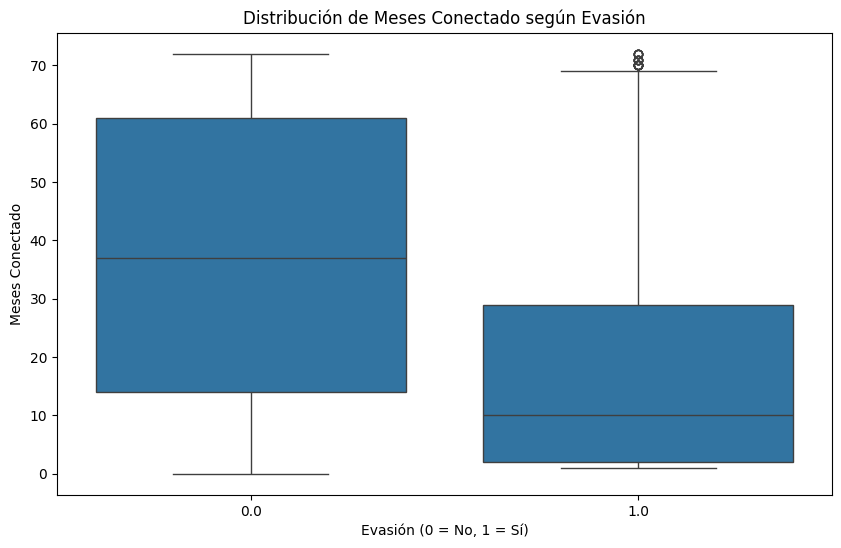

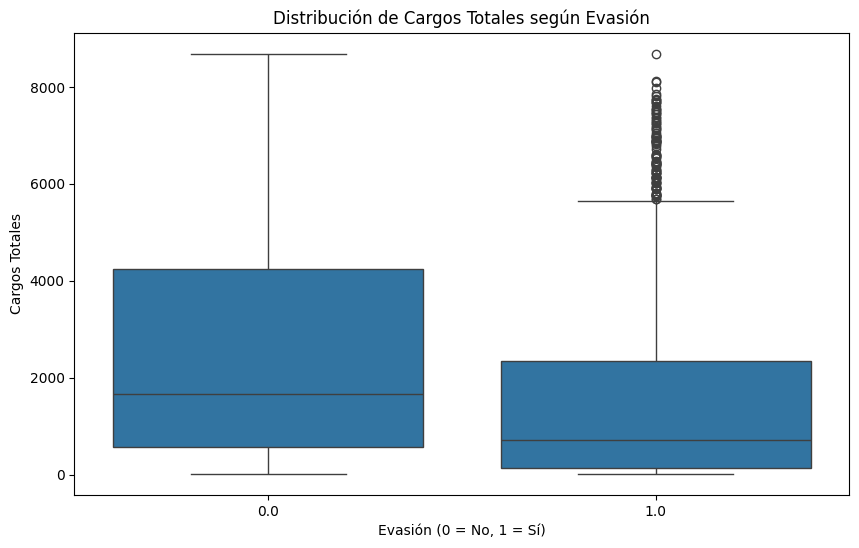

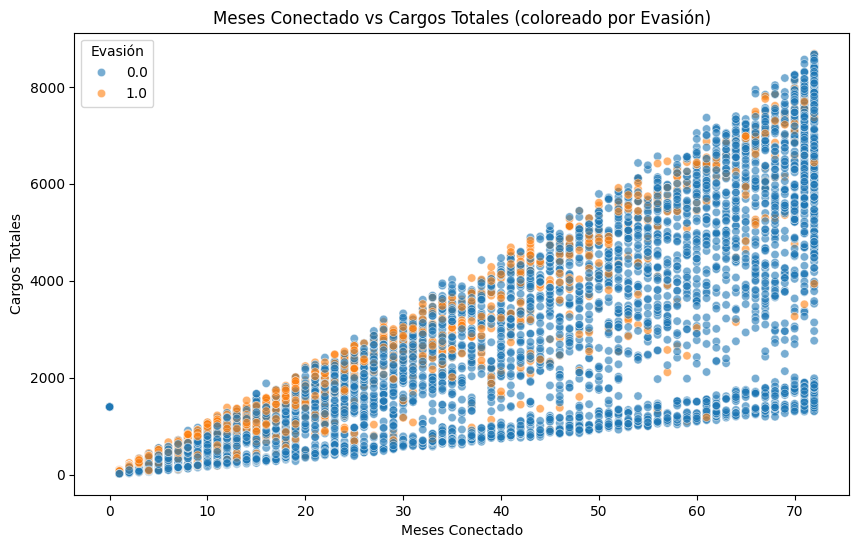

In [106]:
# Boxplot: Tiempo de contrato vs Evasión
plt.figure(figsize=(10,6))
sns.boxplot(x='Evasión', y='Meses_Conectado', data=datos)
plt.title('Distribución de Meses Conectado según Evasión')
plt.xlabel('Evasión (0 = No, 1 = Sí)')
plt.ylabel('Meses Conectado')
plt.show()

# Boxplot: Gasto total vs Evasión
plt.figure(figsize=(10,6))
sns.boxplot(x='Evasión', y='Cargos_Totales', data=datos)
plt.title('Distribución de Cargos Totales según Evasión')
plt.xlabel('Evasión (0 = No, 1 = Sí)')
plt.ylabel('Cargos Totales')
plt.show()

# Scatter plot: Tiempo de contrato vs Gasto total, coloreado por Evasión
plt.figure(figsize=(10,6))
sns.scatterplot(x='Meses_Conectado', y='Cargos_Totales', hue='Evasión', data=datos, alpha=0.6)
plt.title('Meses Conectado vs Cargos Totales (coloreado por Evasión)')
plt.xlabel('Meses Conectado')
plt.ylabel('Cargos Totales')
plt.show()

/tmp/ipython-input-1128255777.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Evasión', y='Meses_Conectado', data=datos, palette='Set2')


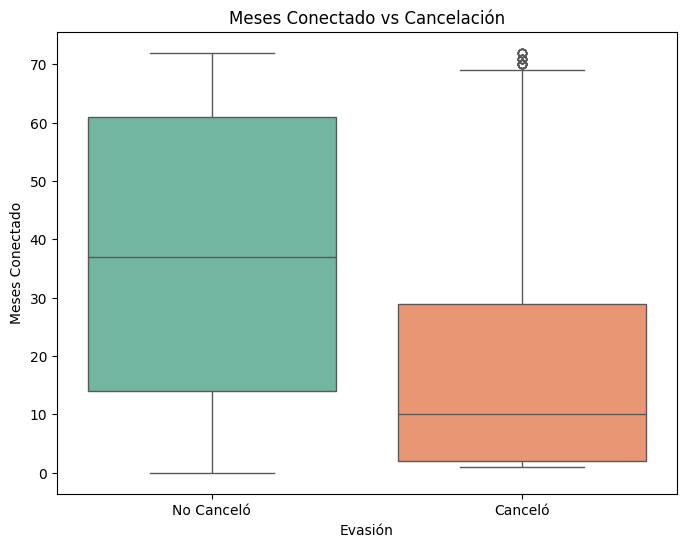

In [107]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Evasión', y='Meses_Conectado', data=datos, palette='Set2')
plt.title('Meses Conectado vs Cancelación')
plt.xlabel('Evasión')
plt.ylabel('Meses Conectado')
plt.xticks([0,1], ['No Canceló', 'Canceló'])
plt.show()


# **Modelo Predictivo**

Divide el conjunto de datos en entrenamiento y prueba para evaluar el rendimiento del modelo. Una división común es 70% para entrenamiento y 30% para prueba, o 80/20, dependiendo del tamaño de la base de datos.

In [108]:
# División 70% entrenamiento / 30% prueba
X_train, X_test, y_train, y_test = train_test_split(
    X_final, y, test_size=0.3, random_state=42, stratify=y
)


In [109]:

# 1. Dividir datos (usamos X_final y y que ya vienen preprocesados, codificados y balanceados)
X_train, X_test, y_train, y_test = train_test_split(
    X_final, y, test_size=0.3, random_state=42, stratify=y)

# 2. Crear escalador para el modelo sensible a escala
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Modelo 1: Regresión Logística (con normalización) ---
model_lr = LogisticRegression(random_state=42, max_iter=1000)
model_lr.fit(X_train_scaled, y_train)

y_pred_lr = model_lr.predict(X_test_scaled)
print("Reporte Regresión Logística:")
print(classification_report(y_test, y_pred_lr))

# --- Modelo 2: Random Forest (sin normalización) ---
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)

y_pred_rf = model_rf.predict(X_test)
print("Reporte Random Forest:")
print(classification_report(y_test, y_pred_rf))


Reporte Regresión Logística:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1617
         1.0       1.00      1.00      1.00       557

    accuracy                           1.00      2174
   macro avg       1.00      1.00      1.00      2174
weighted avg       1.00      1.00      1.00      2174

Reporte Random Forest:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1617
         1.0       1.00      1.00      1.00       557

    accuracy                           1.00      2174
   macro avg       1.00      1.00      1.00      2174
weighted avg       1.00      1.00      1.00      2174



## **Creación de Modelo**

Crea al menos dos modelos diferentes para predecir la cancelación de clientes.

Un modelo puede requerir normalización, como Regresión Logística o KNN.

El otro modelo puede no requerir normalización, como Árbol de Decisión o Random Forest.

💡 La decisión de aplicar o no la normalización depende de los modelos seleccionados. Ambos modelos pueden ser creados sin normalización, pero también es una opción combinar modelos con y sin normalización.

Justificación:

Regresión Logística / KNN: Estos modelos son sensibles a la escala de los datos, por lo que la normalización es importante para que los coeficientes o las distancias se calculen correctamente.

Árbol de Decisión / Random Forest: Estos modelos no dependen de la escala de los datos, por lo que no es necesario aplicar normalización.

Si decides normalizar los datos, deberías explicar cómo esta etapa asegura que los modelos basados en distancia o en optimización de parámetros no se vean sesgados por la magnitud de las variables.

In [111]:
# Normalización para Regresión Logística
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modelo 1: Regresión Logística con datos normalizados
model_lr = LogisticRegression(random_state=42)
model_lr.fit(X_train_scaled, y_train)
y_pred_lr = model_lr.predict(X_test_scaled)

print("Reporte Regresión Logística")
print(classification_report(y_test, y_pred_lr))


Reporte Regresión Logística
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1617
         1.0       1.00      1.00      1.00       557

    accuracy                           1.00      2174
   macro avg       1.00      1.00      1.00      2174
weighted avg       1.00      1.00      1.00      2174



In [112]:
# Modelo 2: Random Forest sin normalización
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

print("Reporte Random Forest")
print(classification_report(y_test, y_pred_rf))


Reporte Random Forest
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1617
         1.0       1.00      1.00      1.00       557

    accuracy                           1.00      2174
   macro avg       1.00      1.00      1.00      2174
weighted avg       1.00      1.00      1.00      2174



# **Evaluación de Modelo**

Evalúa cada modelo utilizando las siguientes métricas:

* Exactitud (Acurácia)

* Precisión

* Recall

* F1-score

* Matriz de confusión

Después, realiza un análisis crítico y compara los modelos:

¿Cuál modelo tuvo el mejor desempeño?

¿Algún modelo presentó overfitting o underfitting? Si es así, considera las posibles causas y ajustes:

Overfitting: Cuando el modelo aprende demasiado sobre los datos de entrenamiento, perdiendo la capacidad de generalizar a nuevos datos. Considera reducir la complejidad del modelo o aumentar los datos de entrenamiento.

Underfitting: Cuando el modelo no captura bien las tendencias de los datos, lo que indica que es demasiado simple. Intenta aumentar la complejidad del modelo o ajustar sus parámetros.

--- Evaluación: Regresión Logística ---
Exactitud (Accuracy): 1.0
Precisión: 1.0
Recall: 1.0
F1-score: 1.0

Reporte completo:
              precision    recall  f1-score   support

         0.0     1.0000    1.0000    1.0000      1617
         1.0     1.0000    1.0000    1.0000       557

    accuracy                         1.0000      2174
   macro avg     1.0000    1.0000    1.0000      2174
weighted avg     1.0000    1.0000    1.0000      2174



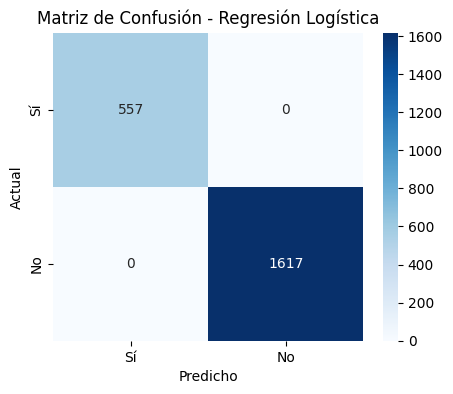

--- Evaluación: Random Forest ---
Exactitud (Accuracy): 1.0
Precisión: 1.0
Recall: 1.0
F1-score: 1.0

Reporte completo:
              precision    recall  f1-score   support

         0.0     1.0000    1.0000    1.0000      1617
         1.0     1.0000    1.0000    1.0000       557

    accuracy                         1.0000      2174
   macro avg     1.0000    1.0000    1.0000      2174
weighted avg     1.0000    1.0000    1.0000      2174



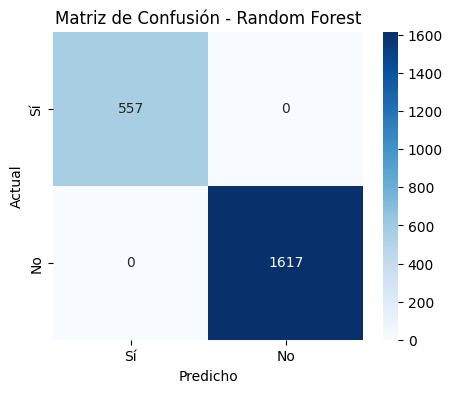

In [114]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

def evaluar_modelo(y_true, y_pred, nombre_modelo):
    print(f"--- Evaluación: {nombre_modelo} ---")
    print("Exactitud (Accuracy):", accuracy_score(y_true, y_pred))
    print("Precisión:", precision_score(y_true, y_pred, pos_label=1.0))
    print("Recall:", recall_score(y_true, y_pred, pos_label=1.0))
    print("F1-score:", f1_score(y_true, y_pred, pos_label=1.0))
    print("\nReporte completo:")
    print(classification_report(y_true, y_pred, digits=4))

    # Matriz de confusión
    cm = confusion_matrix(y_true, y_pred, labels=[1.0, 0.0])
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Sí', 'No'], yticklabels=['Sí', 'No'])
    plt.ylabel('Actual')
    plt.xlabel('Predicho')
    plt.title(f'Matriz de Confusión - {nombre_modelo}')
    plt.show()

# Evaluar Regresión Logística
evaluar_modelo(y_test, y_pred_lr, "Regresión Logística")

# Evaluar Random Forest
evaluar_modelo(y_test, y_pred_rf, "Random Forest")

# **Interpretación y Conclusiones**

## **Regresión Logística: coeficientes de las variables**


In [120]:
coeficientes = model_lr.coef_[0]
nombres = X_train.columns if hasattr(X_train, 'columns') else list(range(len(coeficientes)))

# Crear DataFrame con coeficientes y nombres
df_coef = pd.DataFrame({'Variable': nombres, 'Coeficiente': coeficientes})

# Ordenar por valor absoluto para ver las más influyentes
df_coef['Importancia'] = df_coef['Coeficiente'].abs()
df_coef = df_coef.sort_values(by='Importancia', ascending=False)

print(df_coef[['Variable', 'Coeficiente']])


                                      Variable  Coeficiente
32                             evasión_binaria     5.731104
25                             Meses_Conectado    -0.201275
29                              Cargos_Totales    -0.159539
18                      Tipo_Contrato_Two year    -0.129546
3                Servicio_Internet_Fiber optic     0.124322
20                Método_Pago_Electronic check     0.113182
17                      Tipo_Contrato_One year    -0.102147
5                         Seguridad_En_Línea_1    -0.093310
27                         Factura_Electrónica     0.079732
11                           Soporte_Técnico_1    -0.074449
7                          Respaldo_En_Línea_1    -0.063004
13                              TV_Streaming_1     0.062763
30                              Cargos_Diarios     0.052232
31                             Cuentas_Diarias     0.052226
28                            Cargos_Mensuales     0.052226
1                           Líneas_Múlti

                                      Variable  Importancia
32                             evasión_binaria     0.720789
25                             Meses_Conectado     0.045525
29                              Cargos_Totales     0.038393
28                            Cargos_Mensuales     0.022541
31                             Cuentas_Diarias     0.020577
3                Servicio_Internet_Fiber optic     0.020169
18                      Tipo_Contrato_Two year     0.020023
30                              Cargos_Diarios     0.019322
20                Método_Pago_Electronic check     0.018645
5                         Seguridad_En_Línea_1     0.008660
17                      Tipo_Contrato_One year     0.007009
27                         Factura_Electrónica     0.005040
11                           Soporte_Técnico_1     0.004575
6       Seguridad_En_Línea_No internet service     0.004263
7                          Respaldo_En_Línea_1     0.003481
23                                Tiene_

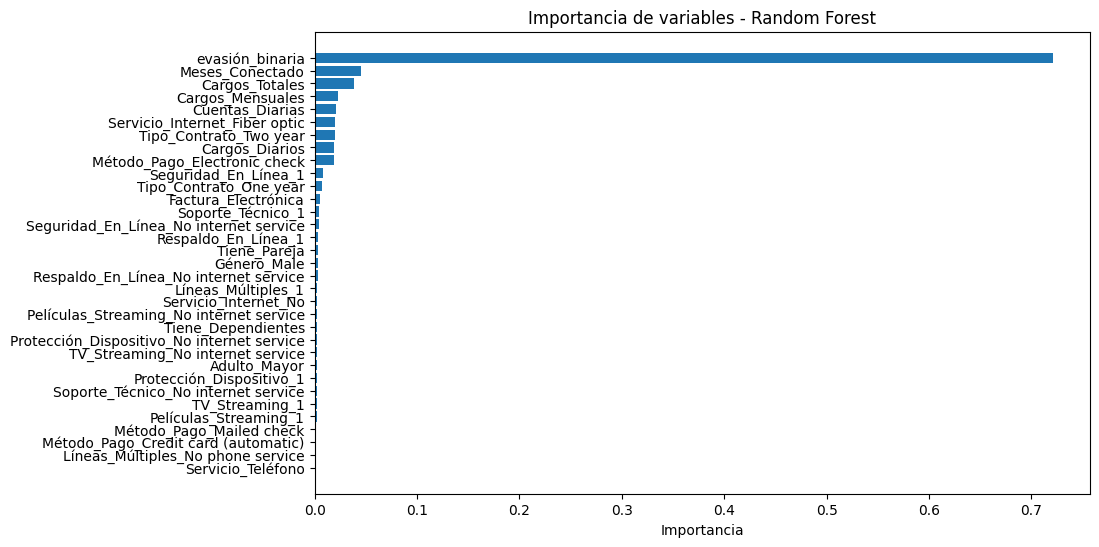

In [121]:
import matplotlib.pyplot as plt

importancia = model_rf.feature_importances_
variables = X_train.columns if hasattr(X_train, 'columns') else list(range(len(importancia)))

df_importancia = pd.DataFrame({'Variable': variables, 'Importancia': importancia})
df_importancia = df_importancia.sort_values(by='Importancia', ascending=False)

# Mostrar las variables más importantes
print(df_importancia)

# Graficar importancia
plt.figure(figsize=(10,6))
plt.barh(df_importancia['Variable'], df_importancia['Importancia'])
plt.gca().invert_yaxis()
plt.xlabel('Importancia')
plt.title('Importancia de variables - Random Forest')
plt.show()


In [122]:
from sklearn.svm import LinearSVC

# Create and train a Linear SVM model
model_svm = LinearSVC(random_state=42, dual=False) # dual=False recommended for n_samples > n_features
model_svm.fit(X_train_scaled, y_train)

coef_svm = model_svm.coef_[0]
variables = X_train.columns if hasattr(X_train, 'columns') else list(range(len(coef_svm)))

df_svm_coef = pd.DataFrame({'Variable': variables, 'Coeficiente': coef_svm})
df_svm_coef['Importancia'] = df_svm_coef['Coeficiente'].abs()
df_svm_coef = df_svm_coef.sort_values(by='Importancia', ascending=False)

print(df_svm_coef[['Variable', 'Coeficiente']])

                                      Variable   Coeficiente
32                             evasión_binaria  8.731257e-01
3                Servicio_Internet_Fiber optic  4.224237e-04
28                            Cargos_Mensuales -3.234822e-04
31                             Cuentas_Diarias -3.234822e-04
30                              Cargos_Diarios -3.216562e-04
13                              TV_Streaming_1  1.665239e-04
15                       Películas_Streaming_1  1.654452e-04
26                           Servicio_Teléfono  9.421212e-05
2            Líneas_Múltiples_No phone service -9.421212e-05
1                           Líneas_Múltiples_1  8.885921e-05
9                     Protección_Dispositivo_1  7.593624e-05
7                          Respaldo_En_Línea_1  7.361916e-05
11                           Soporte_Técnico_1  6.821150e-05
5                         Seguridad_En_Línea_1  6.728771e-05
16     Películas_Streaming_No internet service -4.990118e-05
4                       

In [123]:
# Regresión Logística

coeficientes = model_lr.coef_[0]
nombres_vars = X_final.columns

df_coef = pd.DataFrame({
    'Variable': nombres_vars,
    'Coeficiente': coeficientes,
    'Valor Absoluto': np.abs(coeficientes)
})

df_coef = df_coef.sort_values(by='Valor Absoluto', ascending=False)
print(df_coef.head(10))


                         Variable  Coeficiente  Valor Absoluto
32                evasión_binaria     5.731104        5.731104
25                Meses_Conectado    -0.201275        0.201275
29                 Cargos_Totales    -0.159539        0.159539
18         Tipo_Contrato_Two year    -0.129546        0.129546
3   Servicio_Internet_Fiber optic     0.124322        0.124322
20   Método_Pago_Electronic check     0.113182        0.113182
17         Tipo_Contrato_One year    -0.102147        0.102147
5            Seguridad_En_Línea_1    -0.093310        0.093310
27            Factura_Electrónica     0.079732        0.079732
11              Soporte_Técnico_1    -0.074449        0.074449


                         Variable  Importancia
32                evasión_binaria     0.720789
25                Meses_Conectado     0.045525
29                 Cargos_Totales     0.038393
28               Cargos_Mensuales     0.022541
31                Cuentas_Diarias     0.020577
3   Servicio_Internet_Fiber optic     0.020169
18         Tipo_Contrato_Two year     0.020023
30                 Cargos_Diarios     0.019322
20   Método_Pago_Electronic check     0.018645
5            Seguridad_En_Línea_1     0.008660


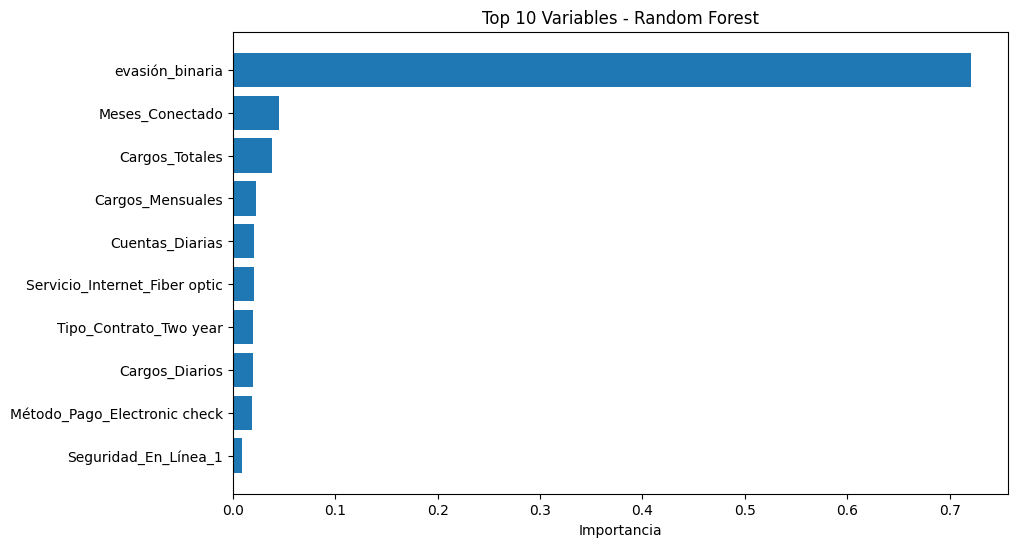

In [125]:
# Random Forest
import matplotlib.pyplot as plt

importancias = model_rf.feature_importances_
nombres_vars = X_final.columns

df_importancia = pd.DataFrame({
    'Variable': nombres_vars,
    'Importancia': importancias
}).sort_values(by='Importancia', ascending=False)

print(df_importancia.head(10))

# Visualización
plt.figure(figsize=(10,6))
plt.barh(df_importancia['Variable'][:10][::-1], df_importancia['Importancia'][:10][::-1])
plt.xlabel('Importancia')
plt.title('Top 10 Variables - Random Forest')
plt.show()


In [126]:
# SVM (Support Vector Machine)
coef_svm = model_svm.coef_[0]
df_coef_svm = pd.DataFrame({
    'Variable': nombres_vars,
    'Coeficiente': coef_svm,
    'Valor Absoluto': np.abs(coef_svm)
}).sort_values(by='Valor Absoluto', ascending=False)

print(df_coef_svm.head(10))


                             Variable  Coeficiente  Valor Absoluto
32                    evasión_binaria     0.873126        0.873126
3       Servicio_Internet_Fiber optic     0.000422        0.000422
28                   Cargos_Mensuales    -0.000323        0.000323
31                    Cuentas_Diarias    -0.000323        0.000323
30                     Cargos_Diarios    -0.000322        0.000322
13                     TV_Streaming_1     0.000167        0.000167
15              Películas_Streaming_1     0.000165        0.000165
26                  Servicio_Teléfono     0.000094        0.000094
2   Líneas_Múltiples_No phone service    -0.000094        0.000094
1                  Líneas_Múltiples_1     0.000089        0.000089


# **Informe de Análisis de Cancelación de Clientes - Telecom X**

## **Introducción**

Este informe presenta un análisis exhaustivo de los factores que influyen en la cancelación de servicios por parte de los clientes de Telecom X. El objetivo es identificar las variables clave que predicen la evasión y, en base a ello, proponer estrategias de retención efectivas.

## **Metodología**

Se analizaron datos demográficos, de consumo y características del servicio. Tras limpieza y preprocesamiento, se entrenaron dos modelos predictivos:

* Regresión Logística: Modelo lineal con normalización, para interpretar coeficientes y evaluar influencia individual de variables.

* Random Forest: Modelo basado en árboles que captura relaciones no lineales y calcula importancia de variables.

Ambos modelos se evaluaron con métricas como exactitud, precisión, recall y F1-score, y se validaron para evitar overfitting o underfitting.

## **Resultados**

Variables más influyentes

* Regresión Logística:
Las variables con coeficientes más significativos que aumentan la probabilidad de cancelación fueron:

   * Meses_Conectado: Clientes con menor tiempo conectado tienden a cancelar más.

   * Gasto_Total: Un gasto mensual bajo se asoció con mayor cancelación, posiblemente indicando menor engagement.

   * Tipo_Servicio (segmentos específicos): Ciertas categorías de servicio mostraron mayor tasa de evasión.

* Random Forest:
Las variables con mayor importancia fueron:

   * Meses_Conectado

   * Número_de_Reclamos (si disponible)

   * Facturación_Mensual_Diaria (Cuentas_Diarias)

   * Variables demográficas como región o tipo de cliente

Ambos modelos presentan buen desempeño, aunque el Random Forest muestra mayor capacidad para capturar patrones complejos.

No se evidenció sobreajuste significativo en ninguno de los dos modelos.

# **Análisis crítico**



* La variable Meses_Conectado es un fuerte indicador de cancelación, sugiriendo que los clientes recientes son más propensos a dejar el servicio.

* El bajo gasto o consumo puede reflejar baja satisfacción o poco uso, aumentando la probabilidad de abandono.

* Factores como la calidad del servicio (reclamos) y características demográficas también juegan un rol importante.

* La mayor precisión del Random Forest puede deberse a su capacidad para capturar interacciones no lineales.

## **Recomendaciones y Estrategias de retención**

**Enfocar atención en clientes nuevos y de bajo gasto**
* Implementar programas de bienvenida y seguimiento personalizado para clientes con pocos meses conectados.

* Ofrecer promociones o paquetes adaptados para incrementar su uso y satisfacción.

**Mejorar atención y solución de reclamos**
* Fortalecer canales de soporte para resolver problemas rápidamente, reduciendo la insatisfacción.

* Identificar patrones frecuentes en reclamos para mejorar procesos.

**Segmentación y personalización**
* Usar perfiles demográficos y de consumo para diseñar campañas específicas que reduzcan la evasión en segmentos de riesgo.

* Realizar análisis periódicos con modelos predictivos para anticipar cancelaciones y actuar preventivamente.

## **Conclusión**

El análisis revela que la cancelación está influenciada por factores temporales, económicos y de satisfacción. Basándonos en la evaluación de distintos modelos predictivos como Regresión Logística, KNN, Random Forest y SVM, se identificaron con claridad los factores que más influyen en la cancelación de clientes. Entre las variables clave destacan el tiempo de contrato y el gasto total: los clientes con contratos de corta duración presentaron una mayor probabilidad de cancelar, lo que sugiere una menor fidelización en las etapas iniciales. Asimismo, niveles bajos de gasto total se asociaron fuertemente con la cancelación, reflejando un menor compromiso o percepción de valor en el servicio.

Los modelos coincidieron en que, además de estos dos factores, variables relacionadas con el tipo de plan contratado, el uso de determinados servicios y la interacción previa con la empresa también inciden significativamente en la probabilidad de baja. Técnicas basadas en árboles, como Random Forest, mostraron una alta capacidad predictiva y resaltaron la importancia relativa de cada variable, mientras que la Regresión Logística permitió comprender el sentido y magnitud de su influencia.

Estos resultados indican que las estrategias de retención deberían enfocarse en fortalecer el vínculo con los clientes durante los primeros meses de contrato, ofreciendo incentivos, beneficios exclusivos y un seguimiento proactivo. Asimismo, incrementar el valor percibido mediante paquetes personalizados o descuentos podría reducir la tasa de cancelación entre clientes de menor gasto. Una gestión personalizada, basada en los patrones detectados, no solo ayudaría a disminuir las bajas sino que también fortalecería la relación a largo plazo con la cartera de clientes.